In [1]:
import numpy as np


In [2]:
def ReLU(z):
    return np.maximum(0,z)
def ReLU_derivative(z):
    return (z > 0).astype(float)

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sigmoid_derivative(z):
    s=sigmoid(z)
    return s *(1-s)

In [24]:
def compute_loss(y,y_pred):
    m=y.shape[0]
    loss_per_sample = (-1 * y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    return np.sum(loss_per_sample)/m


In [25]:
def initialize_params(input_size, hiddenlayer_size, outputlayer_size):

# random initialization of parameters

  params = {
      'W1': np.random.randn(input_size, hiddenlayer_size) * 0.01,
      'b1': np.zeros((1, hiddenlayer_size)),
      'W2': np.random.randn(hiddenlayer_size, outputlayer_size) * 0.01,
      'b2': np.zeros((1, outputlayer_size))
  }

  return params

In [26]:
"""
Performs forward propagation through a 2-layer neural network.

Args:
    input (ndarray): Input data of shape (m, input_dim)
    params (dict): Dictionary containing weights and biases:
                   - 'W1': weights for layer 1 (input to hidden)
                   - 'b1': bias for layer 1
                   - 'W2': weights for layer 2 (hidden to output)
                   - 'b2': bias for layer 2

Returns:
    y_cap (ndarray): Predicted output after sigmoid activation (A2)
    A1 (ndarray): Activation from hidden layer (after ReLU)
    A2 (ndarray): Output layer activation (after sigmoid)
    Z1 (ndarray): Linear combination before ReLU (used in backpropagation)
"""


def forward_pass(input, params):

  Z1 = input @ params['W1'] + params['b1']
  A1 = ReLU(Z1)

  Z2 = A1 @ params['W2'] + params['b2']
  A2 = sigmoid(Z2)

  y_cap = A2

  return y_cap, A1, A2, Z1

In [27]:
def backpropagation(X, y_cap, y, A1, Z1, params):

  m = y.shape[0]

  dZ2 = y_cap - y
  dW2 = (A1.T @ dZ2) / m
  db2 = np.sum(dZ2, axis = 0, keepdims = True) / m

  dA1 = dZ2 @  params['W2'].T
  dZ1 = dA1 * ReLU_derivative(Z1)
  dW1 = (X.T @ dZ1) / m
  db1 = np.sum(dZ1, axis = 0, keepdims=True) / m

  return dW1, dW2, db1, db2

In [28]:
"""
    Updates neural network parameters using gradient descent.

    Args:
        dW1, dW2: Gradients of weights
        db1, db2: Gradients of biases
        params (dict): Current parameters to be updated
        learning_rate (float): Learning rate for gradient descent

    Returns:
        dict: Updated parameters
    """

def update_params(dW1, dW2, db1, db2, params, learning_rate):
    new_params = {}
    new_params['W1'] = params['W1'] - learning_rate * dW1
    new_params['W2'] = params['W2'] - learning_rate * dW2
    new_params['b1'] = params['b1'] - learning_rate * db1
    new_params['b2'] = params['b2'] - learning_rate * db2

    return new_params


In [29]:
"""
Trains a 2-layer neural network using batch gradient descent.

Args:
    X (ndarray): Input data of shape (m, input_size), where m is the number of samples.
    y (ndarray): Ground truth labels of shape (m, 1).
    input_size (int): Number of input features.
    hidden_layer_size (int): Number of neurons in the hidden layer.
    output_size (int): Number of output neurons (typically 1 for binary classification).
    epochs (int): Number of iterations to train the network.
    learning_rate (float): Step size used to update the parameters.

Returns:
    dict: A dictionary containing the trained network parameters:
          - 'W1': Weights from input to hidden layer.
          - 'b1': Biases for hidden layer.
          - 'W2': Weights from hidden to output layer.
          - 'b2': Biases for output layer.

Prints:
    Loss value every 100 epochs to track training progress.
"""

import matplotlib.pyplot as plt
def train(X,y, input_size, hidden_layer_size,output_size, epochs, learning_rate):

  m, n = X.shape
  params = initialize_params(input_size, hidden_layer_size, output_size)
  losses = []
  for _ in range(epochs):

    y_cap, A1, A2, Z1 = forward_pass(X, params )
    loss = compute_loss(y, y_cap)
    losses.append(loss)
    dW1, dW2, db1, db2 = backpropagation(X, y_cap, y, A1, Z1, params)


    params = update_params(dW1, dW2, db1, db2, params, learning_rate)
    if _ % 50 == 0:
      print("W1[0][0] =", params["W1"][0][0])

      print(f"Epoch {_}, Loss: {loss.item():.4f}")

  scalar_losses = [l.item() for l in losses]
  plt.plot(losses)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Training Loss Curve")
  plt.show()

  return params

In [30]:
def predict(X, trained_params, threshold=0.5):
    """
    Predict binary labels for input data X using a trained 2-layer neural network.

    Parameters:
    - X: input data of shape (n_samples, n_features)
    - W1, b1: weights and bias of first layer
    - W2, b2: weights and bias of second/output layer
    - threshold: classification threshold for converting probabilities to 0 or 1

    Returns:
    - y_prob: predicted probabilities
    - y_pred: binary predictions (0 or 1)
    """
    Z1 = np.dot(X, trained_params['W1']) + trained_params['b1']
    A1 = ReLU(Z1)

    Z2 = np.dot(A1, trained_params['W2']) + trained_params['b2']
    A2 = sigmoid(Z2)

    y_prob = A2
    y_pred = (A2 >= threshold).astype(int)

    return y_prob, y_pred

In [31]:

import numpy as np

# Input features (X) for XOR: 4 samples, 2 features each
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Labels (y) for XOR (output is 1 only if inputs differ)
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [32]:

input_size = 2
hidden_layer_size = 5
output_size = 1

W1[0][0] = 0.02450175485712357
Epoch 0, Loss: 0.6932
W1[0][0] = 0.024489056711249197
Epoch 50, Loss: 0.6930
W1[0][0] = 0.05207804638623243
Epoch 100, Loss: 0.6916
W1[0][0] = 0.14956716925781466
Epoch 150, Loss: 0.6808
W1[0][0] = 0.363444127462086
Epoch 200, Loss: 0.6263
W1[0][0] = 0.6320762848821158
Epoch 250, Loss: 0.5347
W1[0][0] = 0.7929496897497428
Epoch 300, Loss: 0.4986
W1[0][0] = 0.8839670832350921
Epoch 350, Loss: 0.4875
W1[0][0] = 0.9349181885473334
Epoch 400, Loss: 0.4841
W1[0][0] = 0.9711473613275631
Epoch 450, Loss: 0.4819
W1[0][0] = 1.0185362465602055
Epoch 500, Loss: 0.4806
W1[0][0] = 1.0474608774103347
Epoch 550, Loss: 0.4800
W1[0][0] = 1.0622198735721495
Epoch 600, Loss: 0.4795
W1[0][0] = 1.0685902139019887
Epoch 650, Loss: 0.4791
W1[0][0] = 1.1112779696485302
Epoch 700, Loss: 0.4788
W1[0][0] = 1.1037745597705568
Epoch 750, Loss: 0.4785
W1[0][0] = 1.1375170152377339
Epoch 800, Loss: 0.4786
W1[0][0] = 1.1220122272698752
Epoch 850, Loss: 0.4784
W1[0][0] = 1.14912853634897

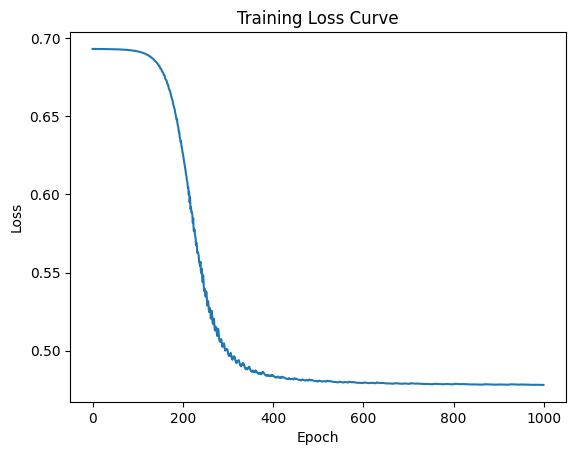

In [33]:
trained_params = train(X, y, input_size, hidden_layer_size, output_size, epochs=1000, learning_rate=0.3)

In [34]:
y_prob, y_pred = predict(X, trained_params)

In [35]:
print(y_prob)

[[0.6656502]
 [0.6656502]
 [0.6656502]
 [0.0027104]]


In [36]:

print(y_pred)

[[1]
 [1]
 [1]
 [0]]
